In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import pandas as pd
import chess 
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("sample.csv")

/home/student.unimelb.edu.au/jmohammed/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['Unnamed: 0', 'Event', 'Site', 'GameNumber', 'WName', 'BName', 'WElo',
       'BElo', 'WRD', 'BRD', 'WIsComp', 'BIsComp', 'TimeControl', 'Date',
       'Time', 'WClock', 'BClock', 'ECO', 'PlyCount', 'Result', 'WMoves',
       'BMoves'],
      dtype='object')

## CapturesByPiece
function takes as argument the pandas dataframe and returns the pandas dataframe with capture count for pair of pieces

In [6]:
def capturesByPiece(df):
    # Dict of dict to store the count of captures made by a piece

    captureCount = dict()
    for attacker in chess.UNICODE_PIECE_SYMBOLS.keys():
        captureCount[attacker] = dict()
        for captured in chess.UNICODE_PIECE_SYMBOLS.keys():
            captureCount[attacker][captured] = 0
    
  
            
    for index, row in df.iterrows():
        WMoves = eval(row["WMoves"])
        BMoves = eval(row["BMoves"])

        board = chess.Board()

        # zipping all the moves and merging into one list 
        allMoves = zip(WMoves, BMoves)
        zippedMoves = list(chain.from_iterable(allMoves))

        for move in zippedMoves:
            if board.is_capture(board.parse_san(move)):
                moveInUCI = board.uci(board.parse_san(move))
#                 print("move:",move)
                attackerPosition, capturedPosition = moveInUCI[:2], moveInUCI[2:4]
#                 print("ap,cp:"+attackerPosition, capturedPosition)
                attacker = board.piece_at(chess.SQUARE_NAMES.index(attackerPosition))
                captured = board.piece_at(chess.SQUARE_NAMES.index(capturedPosition))
#                 print("a,c:",attacker,captured)
                
                if (str(attacker) in captureCount.keys()) and (str(captured) in captureCount.keys()):
                    captureCount[str(attacker)][str(captured)] += 1
        
            board.push_san(move)
        
#         print()
    
    capture_count = pd.DataFrame(captureCount)
    capture_count.rename(columns = chess.UNICODE_PIECE_SYMBOLS, index =  chess.UNICODE_PIECE_SYMBOLS, inplace = True) 

    return  capture_count

CPU times: user 159 ms, sys: 132 ms, total: 292 ms
Wall time: 137 ms


<AxesSubplot:>

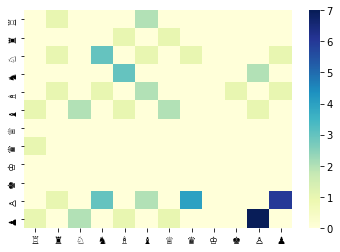

In [8]:
%%time
sns.heatmap(capturesByPiece(df.head(5)), cmap="YlGnBu")